In [1]:
import quadpy
import numpy as np

def has_corner_2d(points):
    flags = [False, False, False]
    for i in range(points.shape[1]):
        point = points[:2, i]
        if np.linalg.norm(point - np.array([0,0])) < 1e-6:
            flags[0] = True
        elif np.linalg.norm(point - np.array([1,0])) < 1e-6:
            flags[1] = True
        elif np.linalg.norm(point - np.array([0,1])) < 1e-6:
            flags[2] = True
    if flags[0] and flags[1] and flags[2]:
        return True
    return False

def has_corner_3d(points):
    flags = [False, False, False, False]
    for i in range(points.shape[1]):
        point = points[:3, i]
        if np.linalg.norm(point - np.array([0,0,0])) < 1e-6:
            flags[0] = True
        elif np.linalg.norm(point - np.array([1,0,0])) < 1e-6:
            flags[1] = True
        elif np.linalg.norm(point - np.array([0,1,0])) < 1e-6:
            flags[2] = True
        elif np.linalg.norm(point - np.array([0,0,1])) < 1e-6:
            flags[3] = True
    if flags[0] and flags[1] and flags[2] and flags[3]:
        return True
    return False

In [40]:
import triangle

schemes_with_corners = []
for scheme in quadpy.t2.schemes.values():
    try:
        scheme = scheme()  # initialize
    except TypeError:
        scheme = scheme(5)

    assert scheme.points.dtype in [np.float64, np.int64], scheme.name
    assert scheme.weights.dtype in [np.float64, np.int64], scheme.name

    if has_corner_2d(scheme.points):
        schemes_with_corners.append(scheme)

final_schemes = []
for o in range(15):
    for scheme in schemes_with_corners:
        if scheme.degree == o:
            print(scheme.name, "order", o)
            scheme.points = scheme.points.transpose()[:, :2]
            final_schemes.append((scheme.degree, scheme))
            break

code = triangle.generate_cpp(final_schemes)
with open('../auto_triangle.ipp', 'w') as f:
    f.write(code)

Vertex scheme order 1
Liu-Vinokur 4 order 2
Seven-point scheme order 3
Liu-Vinokur 10 order 4
Liu-Vinokur 13 order 5
Lyness-Jespersen 11 order 6
Lyness-Jespersen 14 order 7
Lyness-Jespersen 16 order 8
Lyness-Jespersen 19 order 9
Berntsen-Espelid 4 order 13
Taylor-Wingate-Bos 8 order 14


In [2]:
import tetrahedron
from copy import deepcopy

schemes_with_corners = []
for scheme in quadpy.t3.schemes.values():
    scheme = scheme()  # initialize

    assert scheme.points.dtype in [np.float64, np.int64], scheme.name
    assert scheme.weights.dtype in [np.float64, np.int64], scheme.name

    if has_corner_3d(scheme.points):
        pts = deepcopy(scheme.points)
        if np.amin(pts) < 0 or np.amax(pts) > 1:
            print("outside for ", scheme.name)
        schemes_with_corners.append(scheme)

# final_schemes = []
# for o in range(15):
#     for scheme in schemes_with_corners:
#         if scheme.degree == o:
#             print(scheme.name, "order", o)
#             scheme.points = scheme.points[:3,:].transpose()
#             final_schemes.append((scheme.degree, scheme))
#             break

# code = tetrahedron.generate_cpp(final_schemes)
# with open('../auto_tetrahedron.ipp', 'w') as f:
#     f.write(code)

/home/zizhou/miniconda3/lib/python3.9/site-packages/quadpy/helpers/_class.py:20: UserWarning: Jaśkowiec-Sukumar 15 (Tn (n=3)) has low precision (3.687e-11).
  warnings.warn(f"{name} ({self.domain}) has low precision ({tol:.3e}).")
/home/zizhou/miniconda3/lib/python3.9/site-packages/quadpy/helpers/_class.py:20: UserWarning: Jaśkowiec-Sukumar 16 (Tn (n=3)) has low precision (2.653e-11).
  warnings.warn(f"{name} ({self.domain}) has low precision ({tol:.3e}).")
/home/zizhou/miniconda3/lib/python3.9/site-packages/quadpy/helpers/_class.py:20: UserWarning: Jaśkowiec-Sukumar 17 (Tn (n=3)) has low precision (3.831e-11).
  warnings.warn(f"{name} ({self.domain}) has low precision ({tol:.3e}).")
/home/zizhou/miniconda3/lib/python3.9/site-packages/quadpy/helpers/_class.py:20: UserWarning: Jaśkowiec-Sukumar 18 (Tn (n=3)) has low precision (3.470e-11).
  warnings.warn(f"{name} ({self.domain}) has low precision ({tol:.3e}).")
/home/zizhou/miniconda3/lib/python3.9/site-packages/quadpy/helpers/_class.py

In [3]:
for scheme in schemes_with_corners:
    scheme.show()

ModuleNotFoundError: No module named 'vtk'

<quadrature scheme for T2>
  name:                 Lether(1)
  source:               Computation of double integrals over a triangle
                        Frank G. Lether
                        Journal of Computational and Applied Mathematics, vol. 2, no. 3, pp. 219–224, 1976
                        https://doi.org/10.1016/0771-050X%2876%2990008-5
  degree:               0
  num points/weights:   1
  max/min weight ratio: 1.000e+00
  test tolerance:       1e-14
  point position:       strictly inside
  all weights positive: True
<quadrature scheme for T2>
  name:                 Lether(2)
  source:               Computation of double integrals over a triangle
                        Frank G. Lether
                        Journal of Computational and Applied Mathematics, vol. 2, no. 3, pp. 219–224, 1976
                        https://doi.org/10.1016/0771-050X%2876%2990008-5
  degree:               2
  num points/weights:   4
  max/min weight ratio: 3.732e+00
  test tolerance:      

/home/zizhou/miniconda3/lib/python3.9/site-packages/quadpy/helpers/_class.py:20: UserWarning: Lyness-Jespersen 16 (Tn (n=2)) has low precision (7.282e-12).
  warnings.warn(f"{name} ({self.domain}) has low precision ({tol:.3e}).")
/home/zizhou/miniconda3/lib/python3.9/site-packages/quadpy/helpers/_class.py:20: UserWarning: Vioreanu-Rokhlin 19 (Tn (n=2)) has low precision (4.084e-12).
  warnings.warn(f"{name} ({self.domain}) has low precision ({tol:.3e}).")


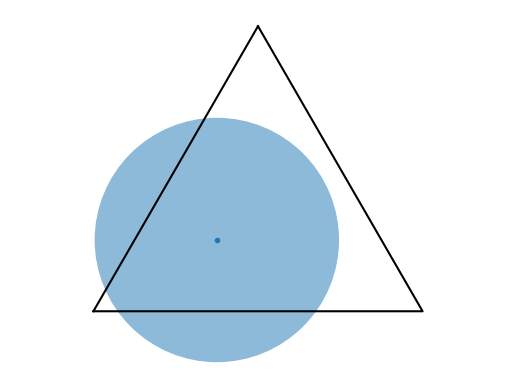

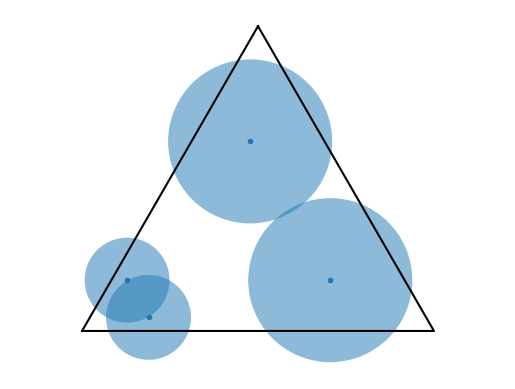

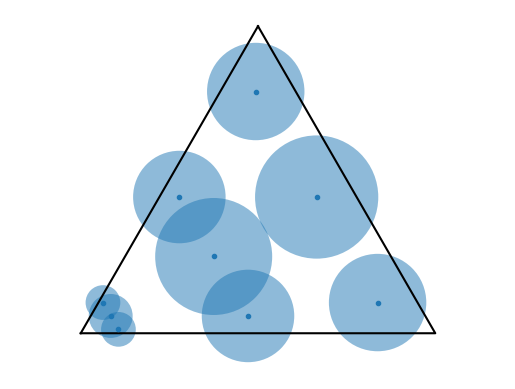

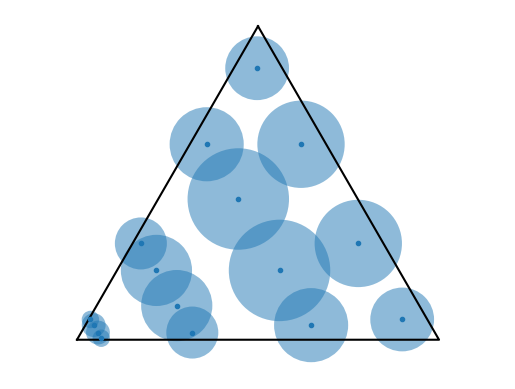

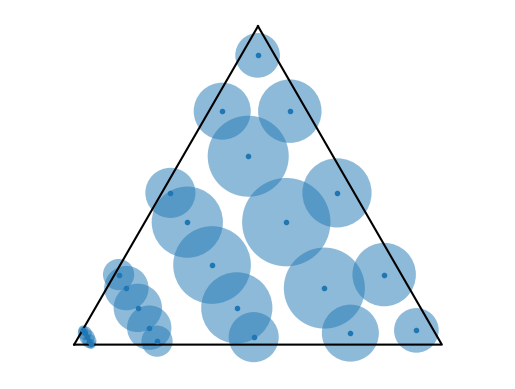

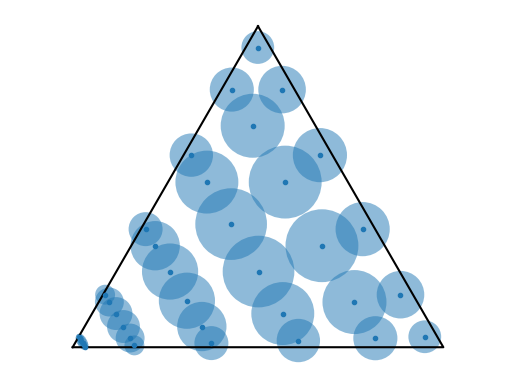

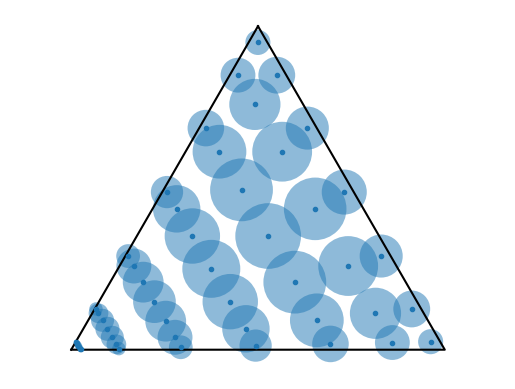

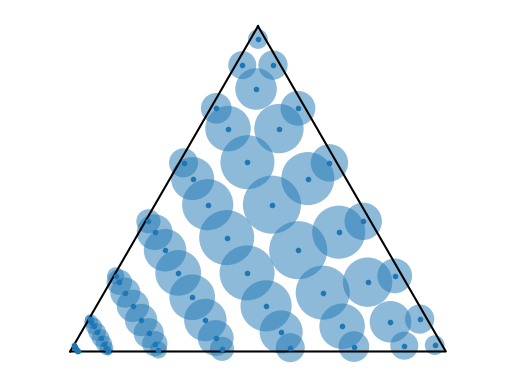

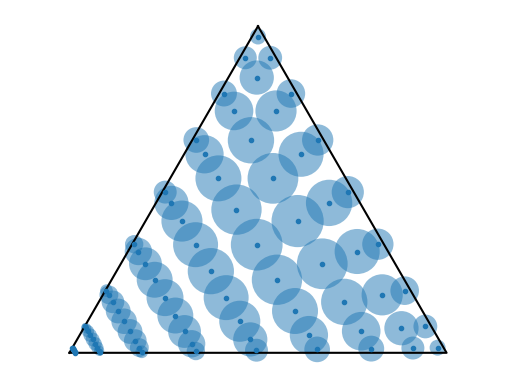

In [22]:
import matplotlib.pyplot as plt
for scheme in quadpy.t2.schemes.values():
    try:
        scheme = scheme()  # initialize
    except TypeError:
        for i in range(1, 10):
            print(scheme(i))
            plt.figure()
            scheme(i).plot()